# Multiple Linear Regression

### Bike Sharing Assignment

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Step 1: Reading and Understanding the Data

In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading CSV file

df = pd.read_csv("day.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- **There are no Null values in the dataset.**

## Step 2: Data Preparation

In [5]:
# Convert "dteday" to Datetime object.

df['dteday'] = pd.to_datetime(df['dteday'],format="%d-%m-%Y")

In [6]:
df.season.unique()

array([1, 2, 3, 4], dtype=int64)

In [7]:
# Convert "Season" from Numerical to Categorical Variable.

df[["season"]] = df[["season"]].apply(lambda x : x.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"}))

In [8]:
df.weathersit.unique()

array([2, 1, 3], dtype=int64)

In [9]:
# Convert "weathersit" from Numerical to Categorical Variable.

df[["weathersit"]] = df[["weathersit"]].apply(lambda x : x.map({1:"Clear", 2:"Mist", 3:"Snow", 4:"Rain"}))

In [10]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
df.describe()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2018-12-31 12:00:00,0.500000,6.526027,0.028767,2.997260,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
min,1.000000,2018-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2018-07-02 06:00:00,0.000000,4.000000,0.000000,1.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,2018-12-31 12:00:00,0.500000,7.000000,0.000000,3.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,2019-07-01 18:00:00,1.000000,10.000000,0.000000,5.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,2019-12-31 00:00:00,1.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,210.877136,NaN,0.500343,3.450215,0.167266,2.006161,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647


<Figure size 2000x1000 with 0 Axes>

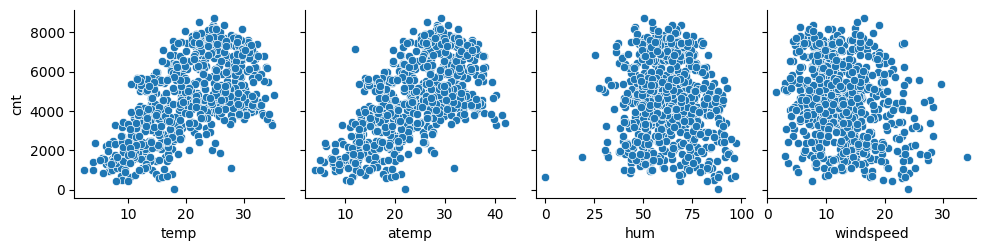

In [12]:
plt_1 = plt.figure(figsize=(20, 10))
sns.pairplot(df, x_vars=['temp','atemp','hum','windspeed'], y_vars='cnt', kind='scatter')
plt.show()

- temp and atemp is showing linearity with cnt.

<Figure size 2000x1000 with 0 Axes>

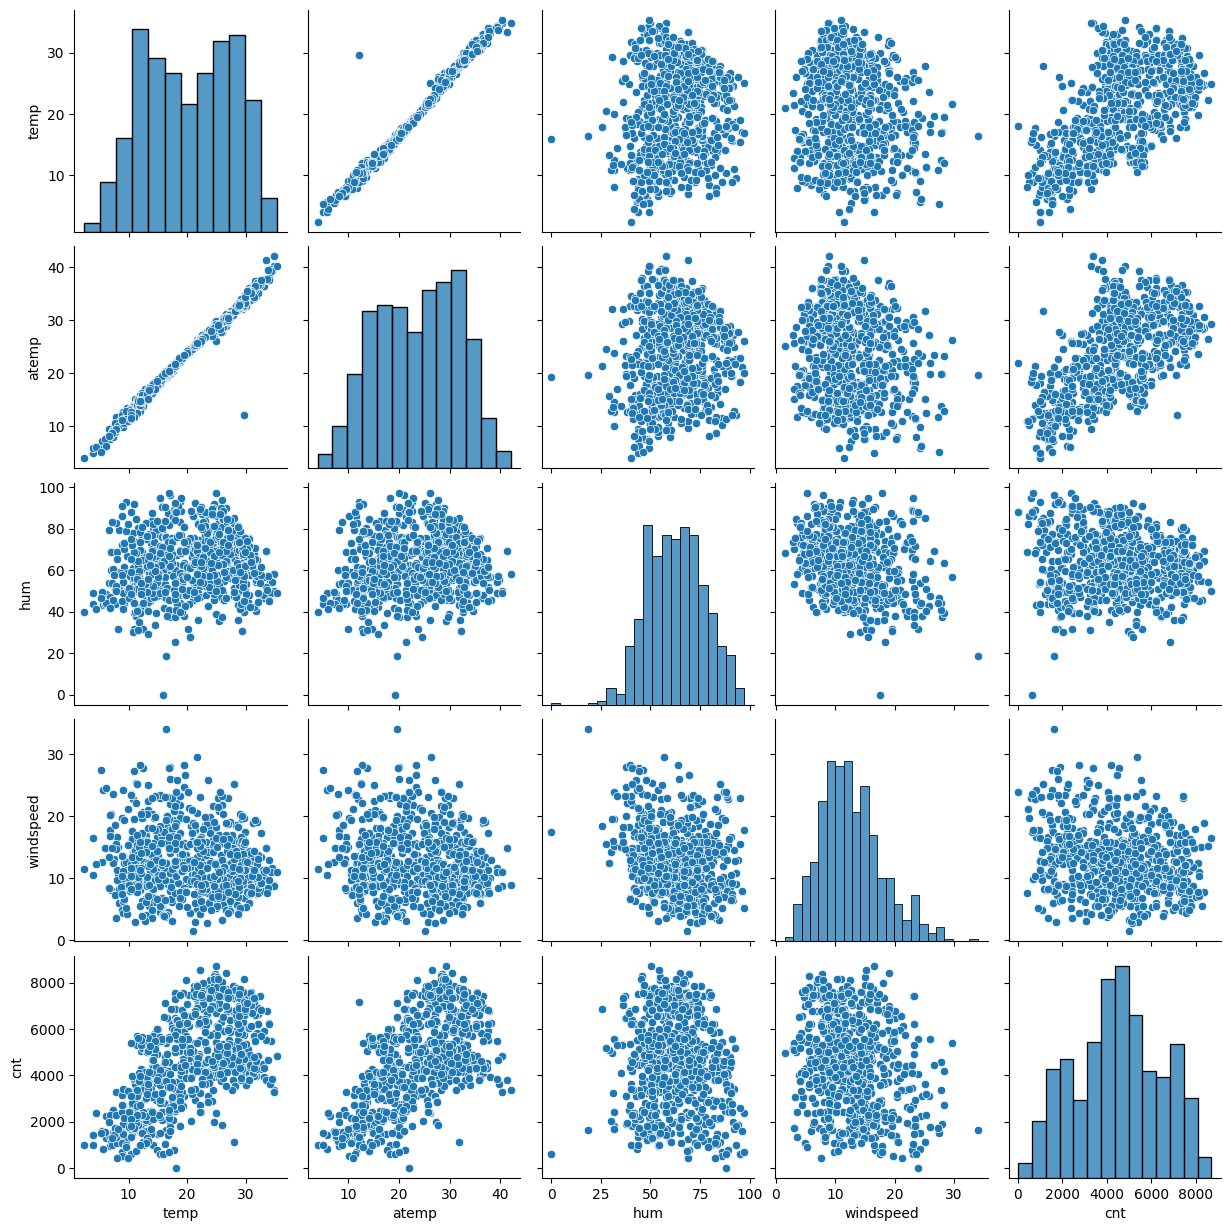

In [13]:
plt_1 = plt.figure(figsize=(20, 10))
sns.pairplot(df, x_vars=['temp','atemp','hum','windspeed','cnt'], y_vars=['temp','atemp','hum','windspeed','cnt'], kind='scatter')
plt.show()

## Step 3: Exploratory Data Analysis

<Axes: xlabel='weathersit', ylabel='cnt'>

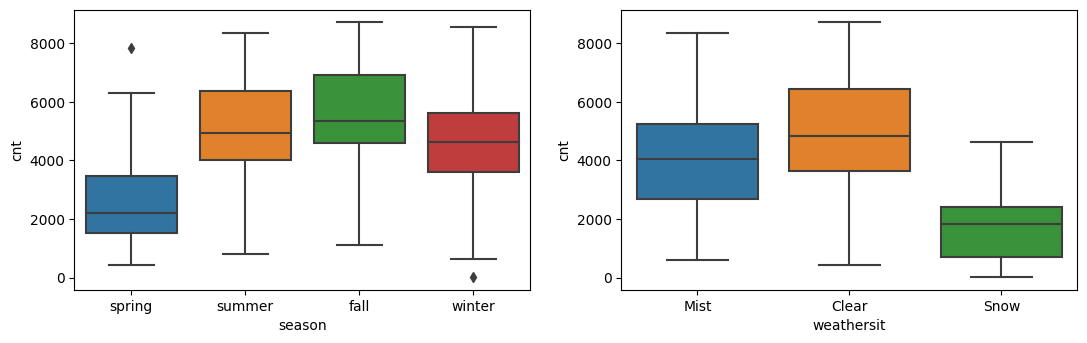

In [14]:
plt.figure(figsize=(20, 8))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)

- Spring has the lowest bike rental ratio than other seasons.
- In snow, people avoid traveling by bike.

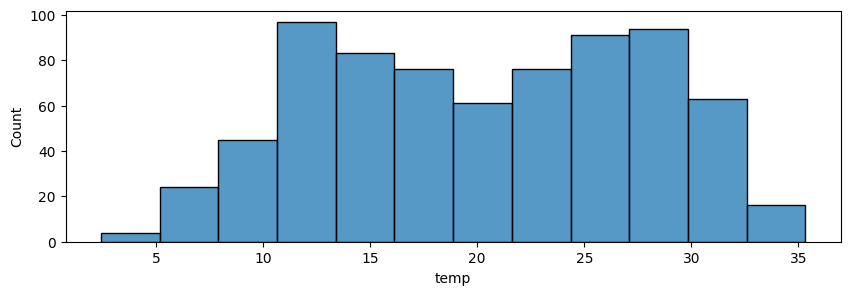

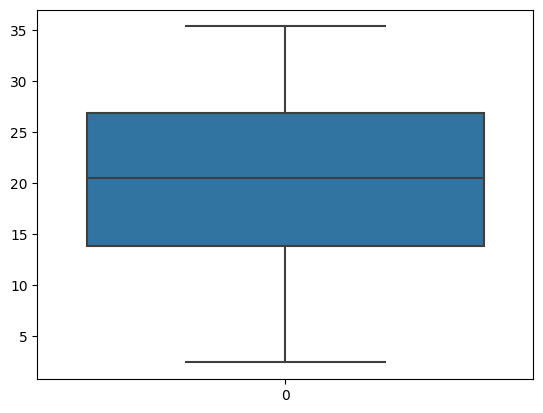

In [15]:
plt.figure(figsize=(10,3))
        
sns.histplot(df["temp"])
plt.show()

sns.boxplot(df["temp"])

plt.show()

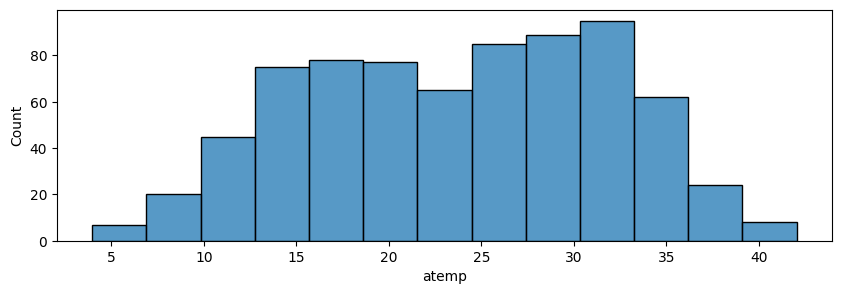

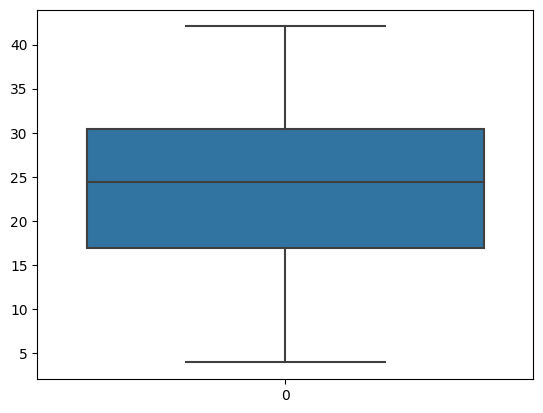

In [16]:
plt.figure(figsize=(10,3))
        
sns.histplot(df["atemp"])
plt.show()

sns.boxplot(df["atemp"])

plt.show()

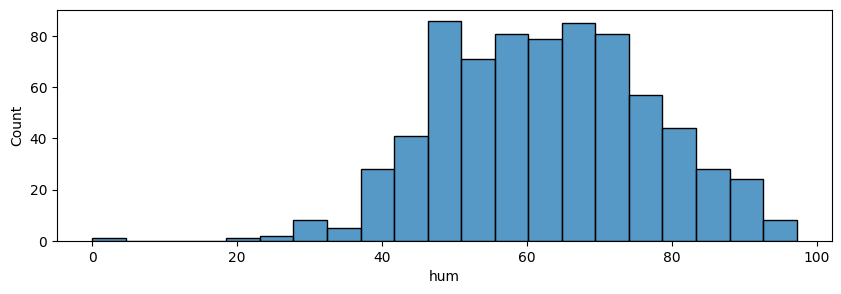

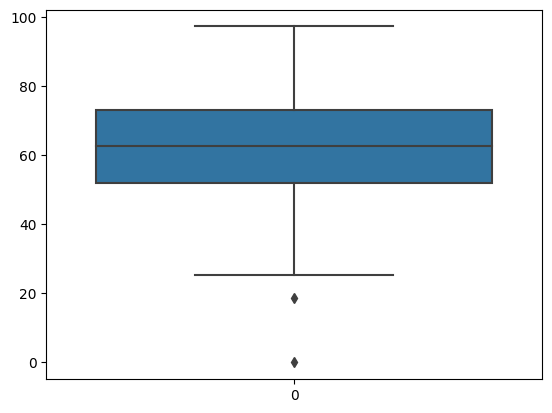

In [17]:
plt.figure(figsize=(10,3))
        
sns.histplot(df["hum"])
plt.show()

sns.boxplot(df["hum"])

plt.show()

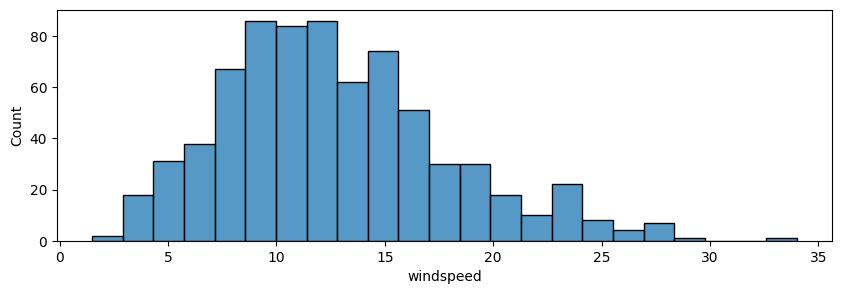

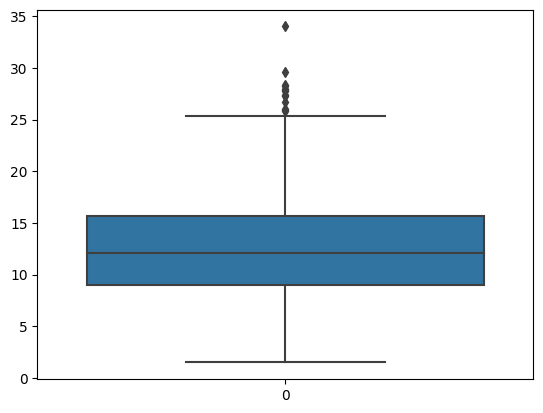

In [18]:
plt.figure(figsize=(10,3))
        
sns.histplot(df["windspeed"])
plt.show()

sns.boxplot(df["windspeed"])

plt.show()

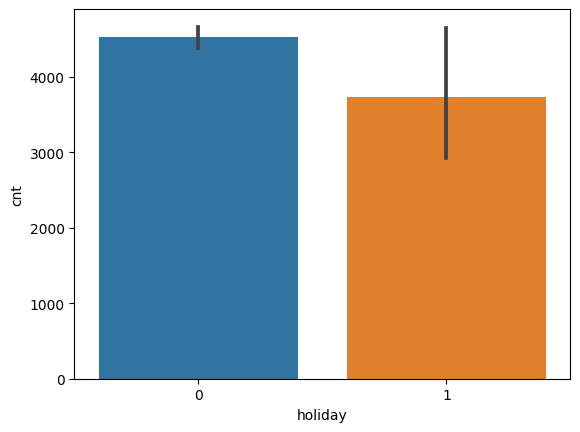

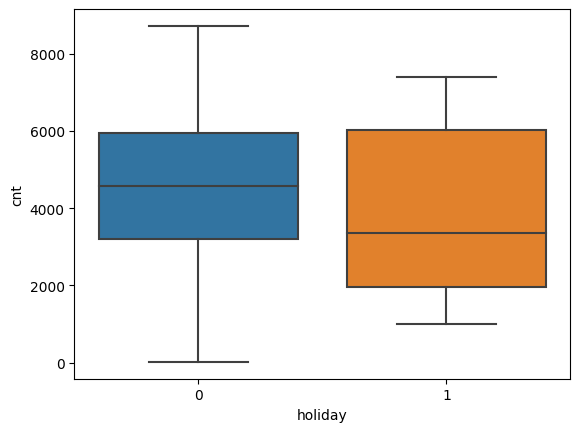

In [19]:
sns.barplot(x = 'holiday',y ="cnt" ,data = df)
plt.show()

sns.boxplot(data = df,x = 'holiday',y = "cnt")
plt.show()

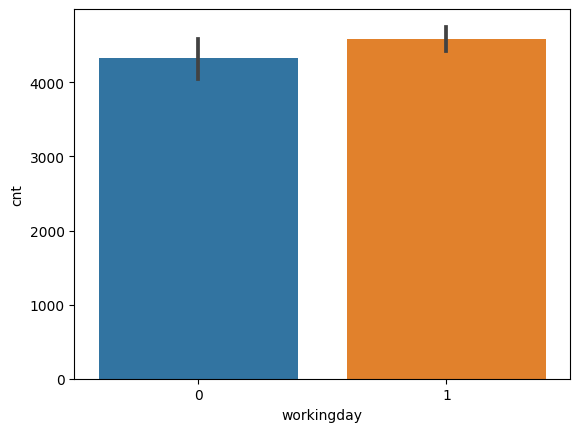

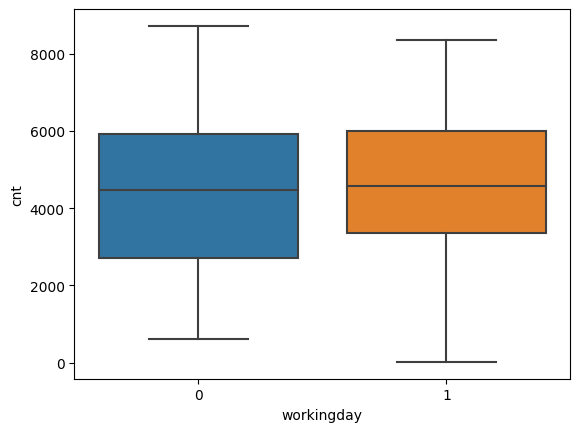

In [20]:
sns.barplot(x = 'workingday',y ="cnt" ,data = df)
plt.show()

sns.boxplot(data = df,x = 'workingday',y = "cnt")
plt.show()

<Axes: xlabel='weathersit', ylabel='cnt'>

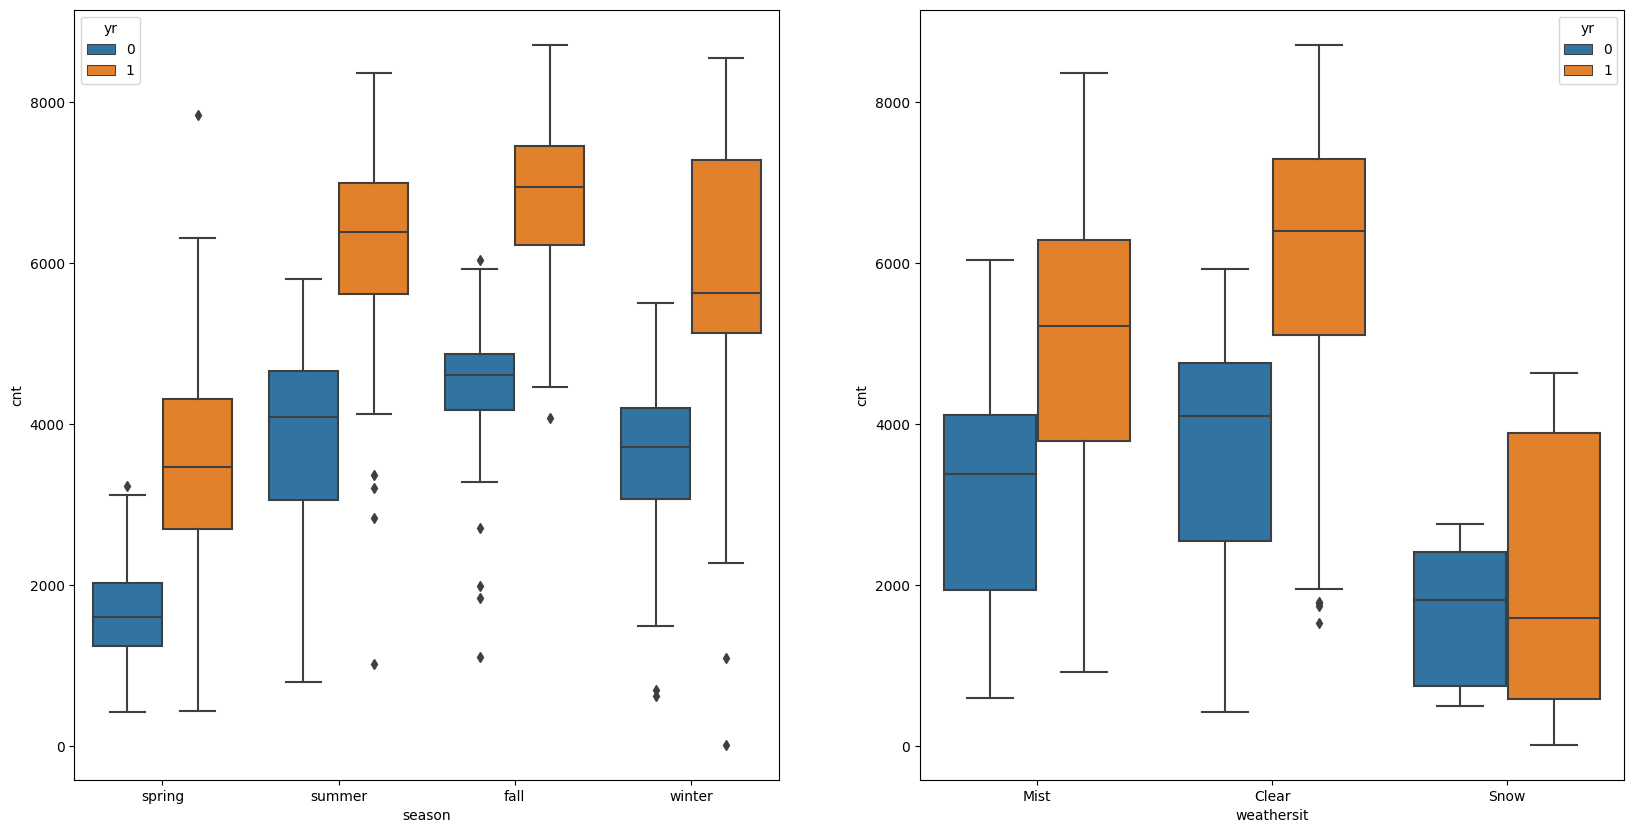

In [21]:
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df, hue = 'yr')
plt.subplot(1,2,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df, hue = 'yr')

- Year 2019 has higher rental than 2018.

<Axes: xlabel='weathersit', ylabel='cnt'>

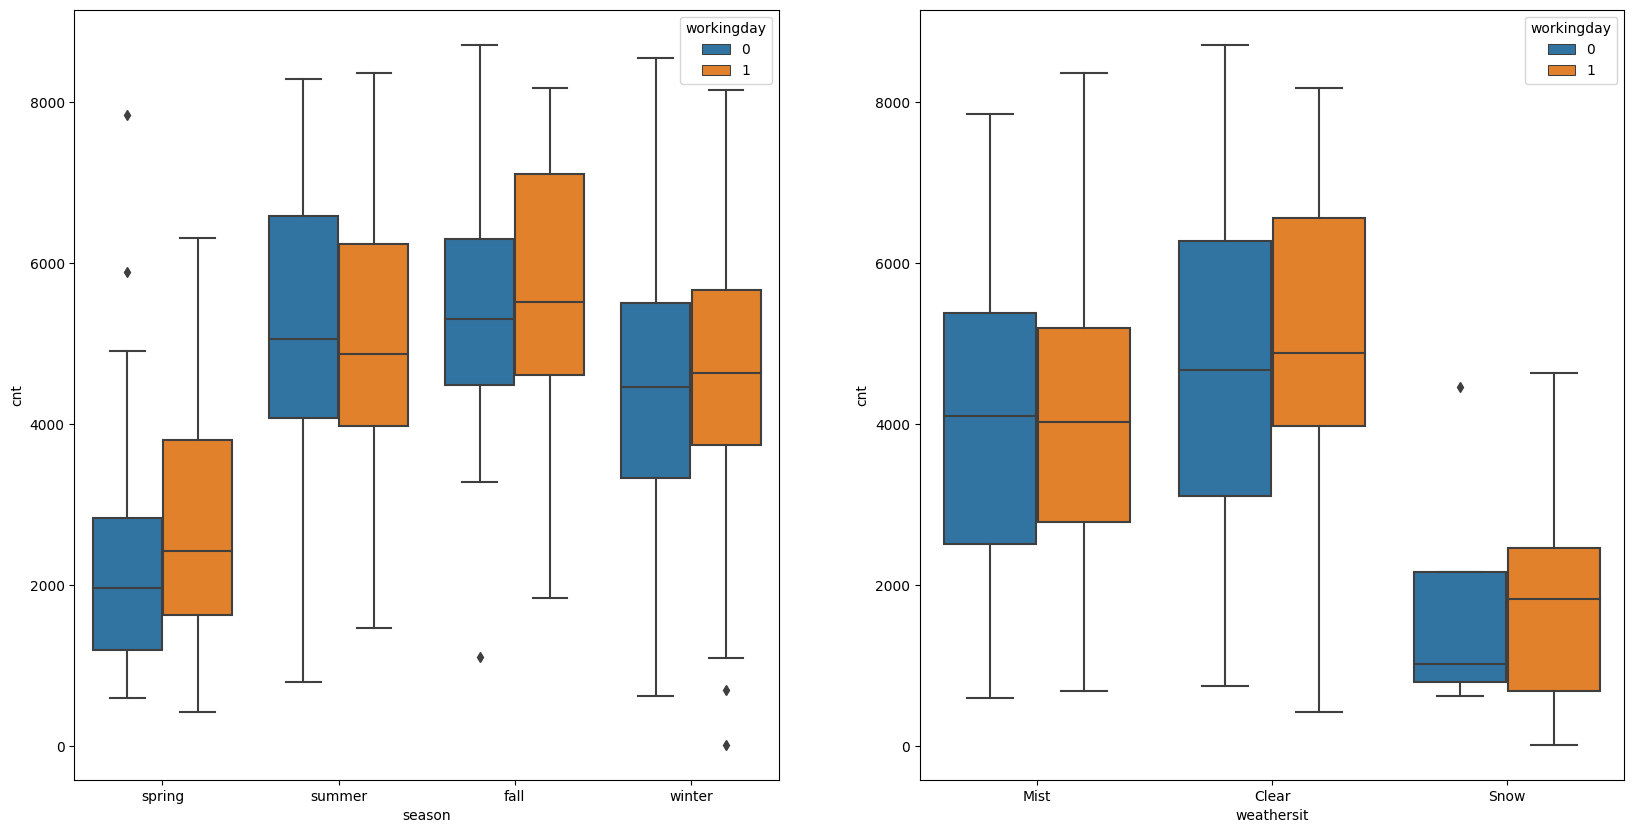

In [22]:
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df, hue = 'workingday')
plt.subplot(1,2,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df, hue = 'workingday')

There are not major diffrences in Weekend and working day bike rental count in any season and weater situation.

<Axes: xlabel='mnth', ylabel='cnt'>

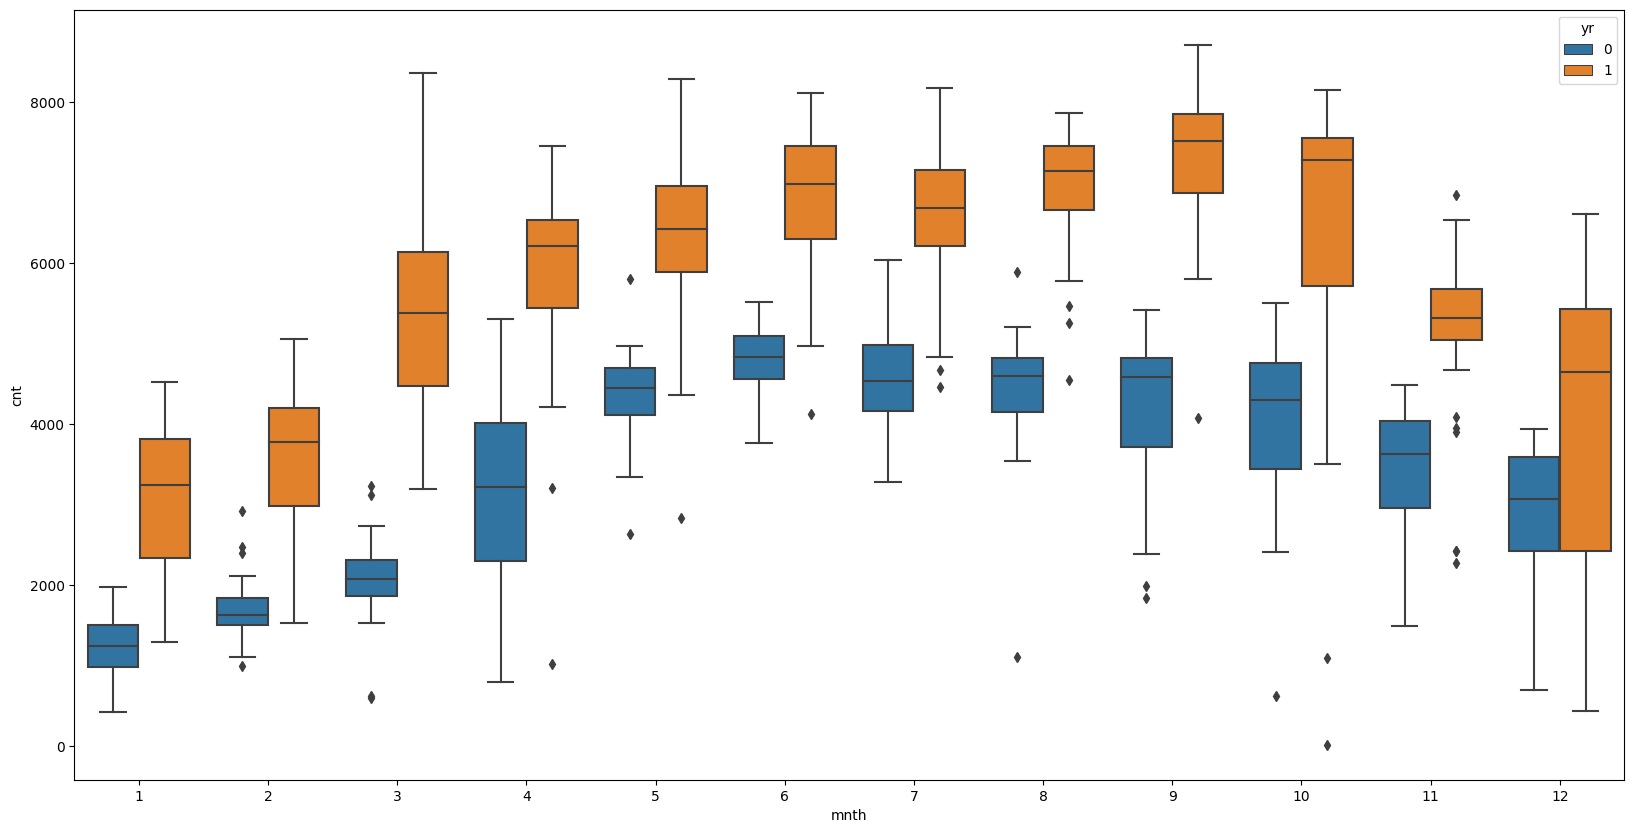

In [23]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = 'mnth', y = 'cnt', data = df, hue = 'yr')

In [24]:
df_2 = df.copy()

In [25]:
def atemp_conv(atemp_is):
    
    if atemp_is < 10:
        return "Low Temp"
    elif atemp_is >= 10 and atemp_is <= 20:
        return "Medium Low Temp"
    elif atemp_is >= 20 and atemp_is <= 30:
        return "Normal Temp"
    elif atemp_is >= 30 and atemp_is <= 40:
        return "Medium High Temp"
    else:
        return "High Temp"
    

In [26]:
df_2["atemp_cat"] = df_2["atemp"].apply(lambda x : atemp_conv(x))

In [27]:
def hum_conv(hum_is):
    
    if hum_is < 20:
        return "Low Hum"
    elif hum_is >= 20 and hum_is <= 40:
        return "Medium Low Hum"
    elif hum_is >= 40 and hum_is <= 60:
        return "Normal Hum"
    elif hum_is >= 60 and hum_is <= 80:
        return "Medium High Hum"
    else:
        return "High Hum"

In [28]:
df_2["hum_cat"] = df_2["hum"].apply(lambda x : hum_conv(x))

In [29]:
def wind_speed_conv(wind_speed_is):
    
    if wind_speed_is < 5:
        return "Low speed"
    elif wind_speed_is >= 5 and wind_speed_is <= 10:
        return "Medium Low speed"
    elif wind_speed_is >= 10 and wind_speed_is <= 15:
        return "Normal Low speed"
    elif wind_speed_is >= 15 and wind_speed_is <= 20:
        return "Normal speed"
    elif wind_speed_is >= 20 and wind_speed_is <= 25:
        return "Normal High speed"
    elif wind_speed_is >= 25 and wind_speed_is <= 30:
        return "Medium High speed"
    else:
        return "High speed"

In [30]:
df_2["wind_speed_cat"] = df_2["windspeed"].apply(lambda x : wind_speed_conv(x))

In [31]:
df_2.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,atemp_cat,hum_cat,wind_speed_cat
0,1,2018-01-01,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,Medium Low Temp,High Hum,Normal Low speed
1,2,2018-01-02,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,Medium Low Temp,Medium High Hum,Normal speed
2,3,2018-01-03,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,Low Temp,Normal Hum,Normal speed
3,4,2018-01-04,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,Medium Low Temp,Normal Hum,Normal Low speed
4,5,2018-01-05,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,Medium Low Temp,Normal Hum,Normal Low speed


<Axes: xlabel='atemp_cat', ylabel='cnt'>

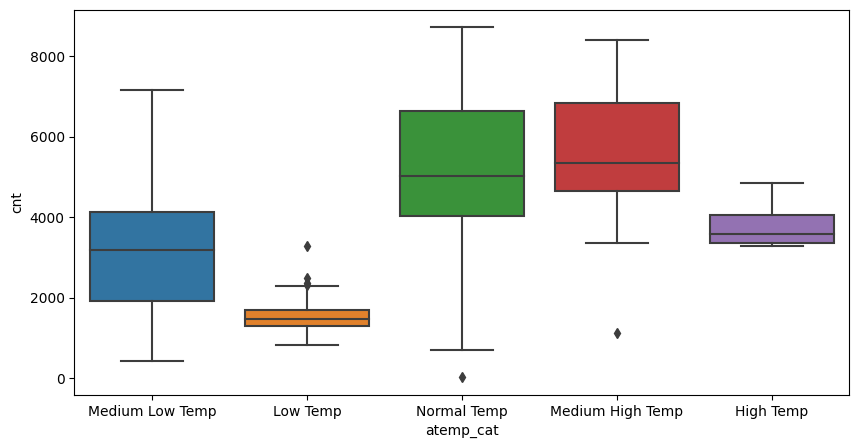

In [32]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'atemp_cat', y = 'cnt', data = df_2)


- Temprature is effecting the Bike Rental service. Too high and Too low temp is not good for Bike Rental Business.

<Axes: xlabel='hum_cat', ylabel='cnt'>

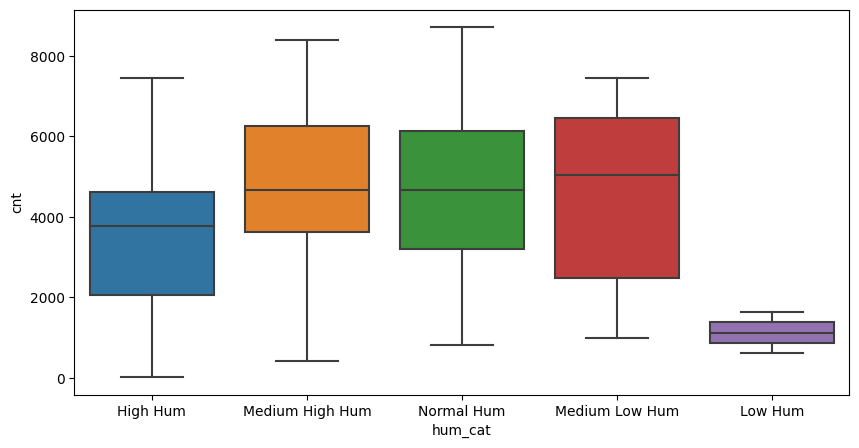

In [33]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'hum_cat', y = 'cnt', data = df_2)

- Low Humudity enviorment is not suitable for Bike rental Business.

<Axes: xlabel='wind_speed_cat', ylabel='cnt'>

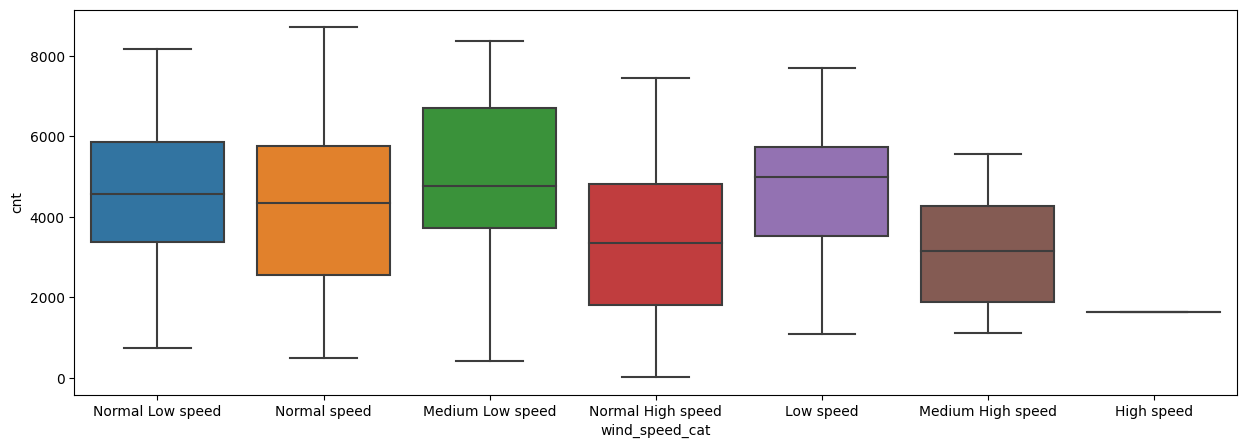

In [34]:
plt.figure(figsize=(15, 5))
sns.boxplot(x = 'wind_speed_cat', y = 'cnt', data = df_2)

- Wind Speed is not much effecting the Bike Rental Business.

<Axes: xlabel='wind_speed_cat', ylabel='cnt'>

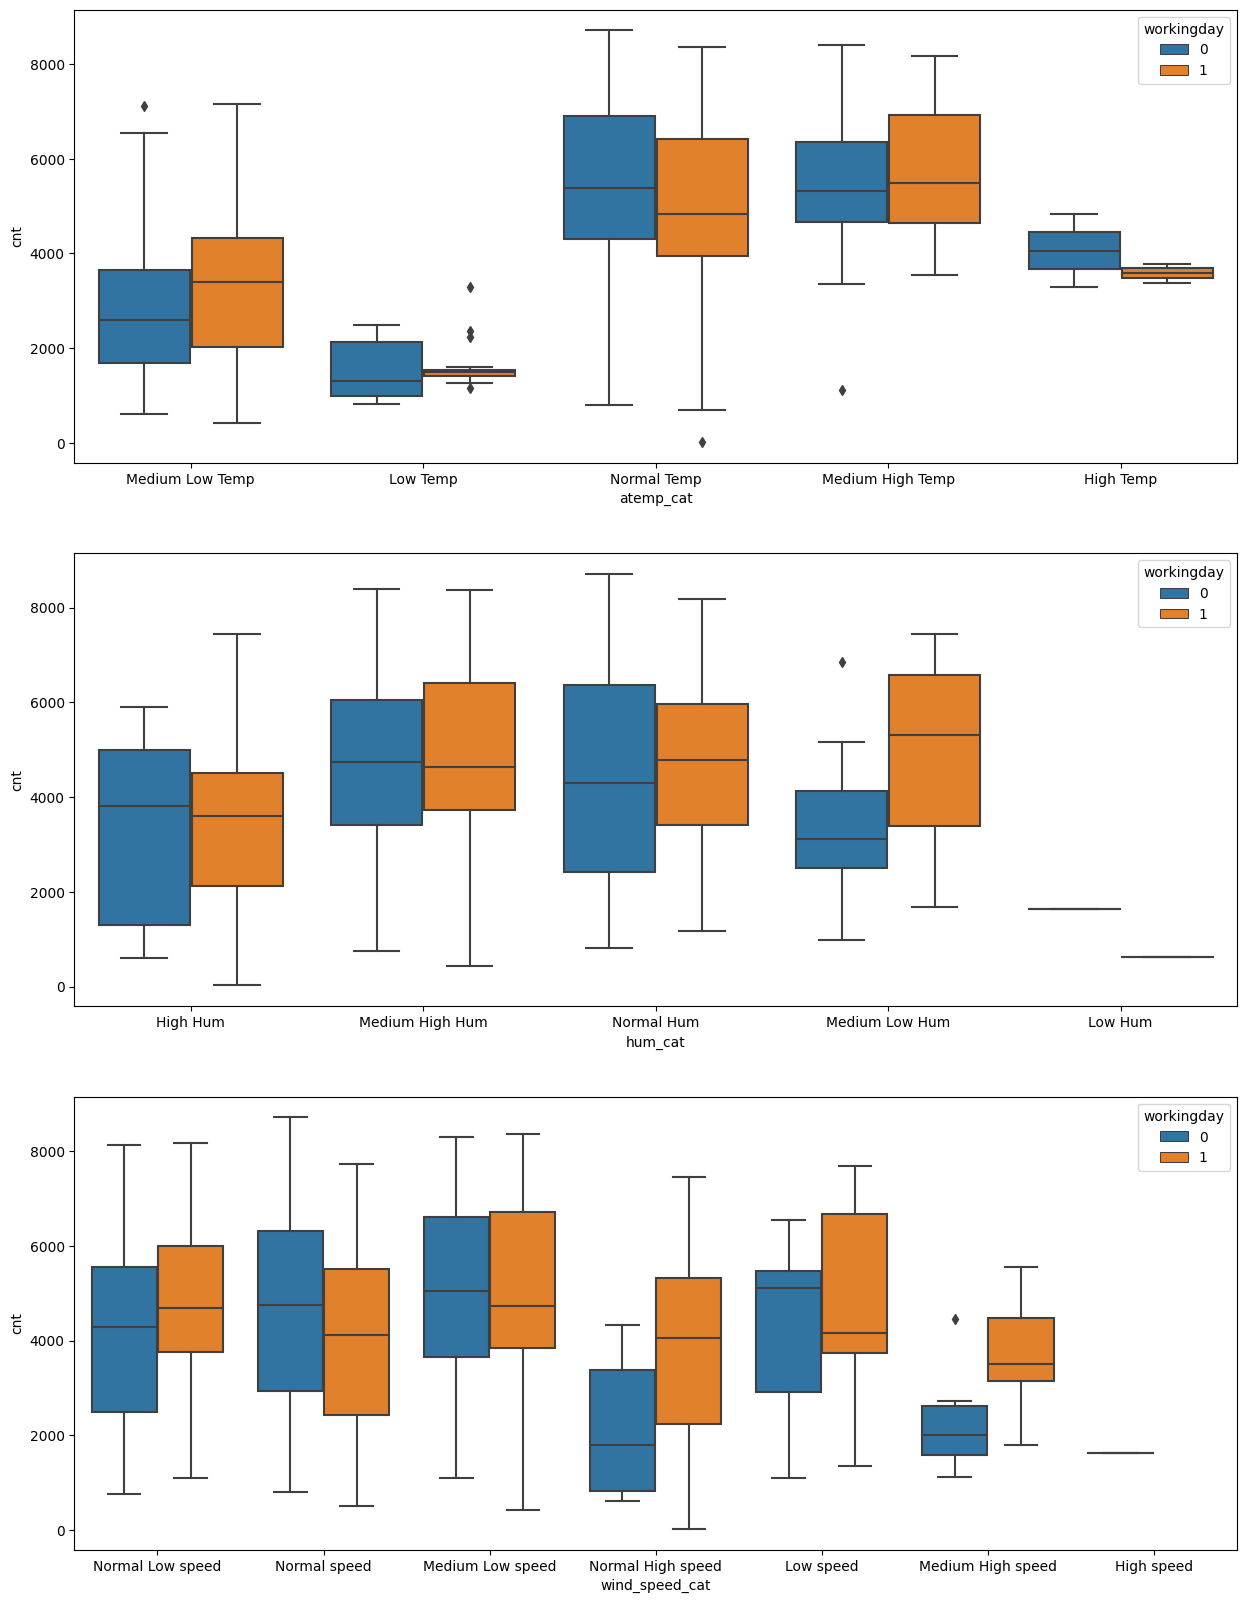

In [35]:
plt.figure(figsize=(15, 20))
plt.subplot(3,1,1)
sns.boxplot(x = 'atemp_cat', y = 'cnt', data = df_2, hue = 'workingday')
plt.subplot(3,1,2)
sns.boxplot(x = 'hum_cat', y = 'cnt', data = df_2, hue = 'workingday')
plt.subplot(3,1,3)
sns.boxplot(x = 'wind_speed_cat', y = 'cnt', data = df_2, hue = 'workingday')

<Axes: xlabel='weathersit', ylabel='cnt'>

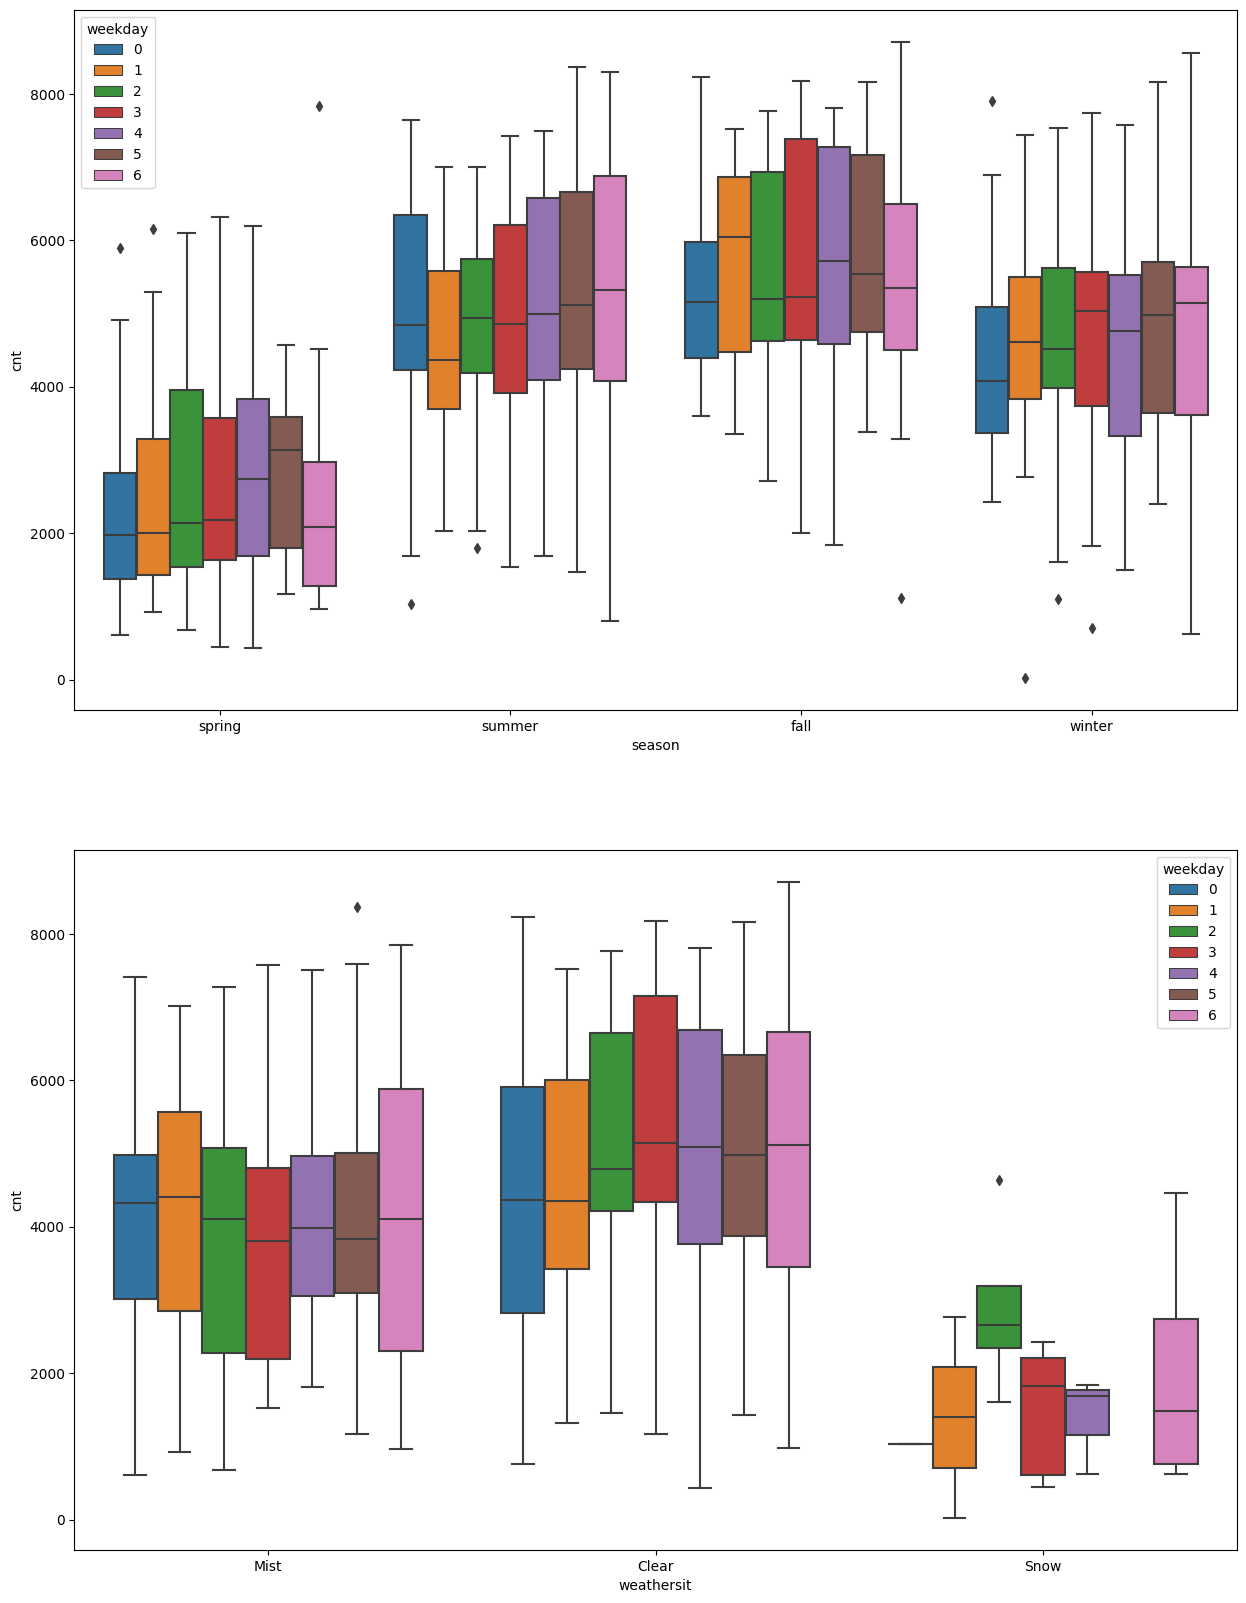

In [36]:
plt.figure(figsize=(15, 20))
plt.subplot(2,1,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_2, hue = 'weekday')
plt.subplot(2,1,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_2, hue = 'weekday')


<Axes: xlabel='dteday'>

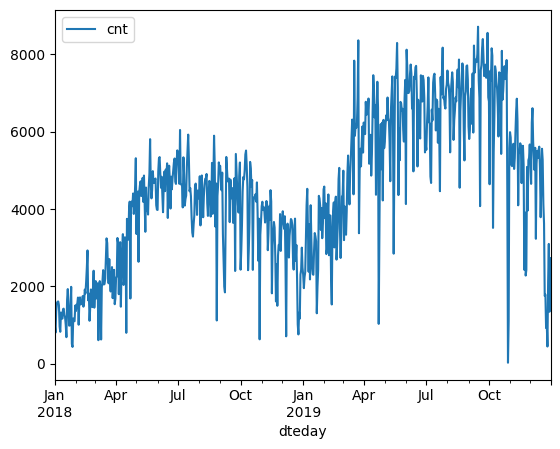

In [37]:
df.plot.line(x='dteday', y='cnt')

C:\Users\harsh.trivedi\AppData\Roaming\MobaXterm\slash\var\log\xwin\ipykernel_2776\2154727874.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["cnt"])


<Axes: xlabel='cnt', ylabel='Density'>

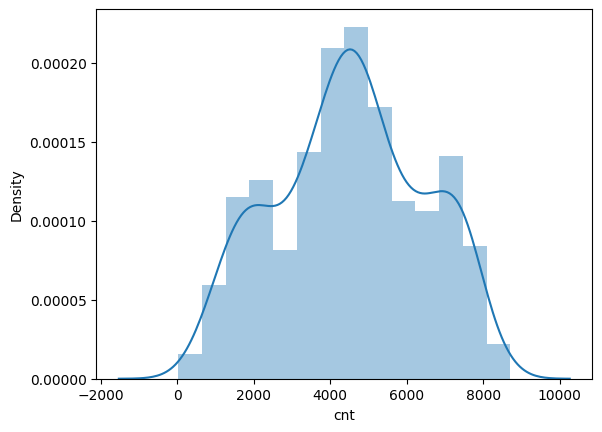

In [38]:
sns.distplot(df["cnt"])

In [39]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Dummy Variables

In [40]:
# Dummy Variable

season_status = pd.get_dummies(df["season"],drop_first = True,dtype=int)
weathersit_status = pd.get_dummies(df["weathersit"],drop_first = True,dtype=int)

In [41]:
df_new = pd.concat([df, season_status,weathersit_status], axis = 1)

In [42]:
df_new.drop(['season','weathersit','instant','dteday','casual','registered'], axis = 1, inplace = True)

In [43]:
df_new.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Mist,Snow
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [44]:
# Spliting Data

from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

In [45]:
# Re-Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [46]:
num_vars = ['temp', 'atemp', 'hum','windspeed','cnt']

In [47]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [48]:
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Mist,Snow
653,1,10,0,2,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0
576,1,7,0,2,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0
426,1,3,0,6,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,1,0
728,1,12,0,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0
482,1,4,0,6,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0


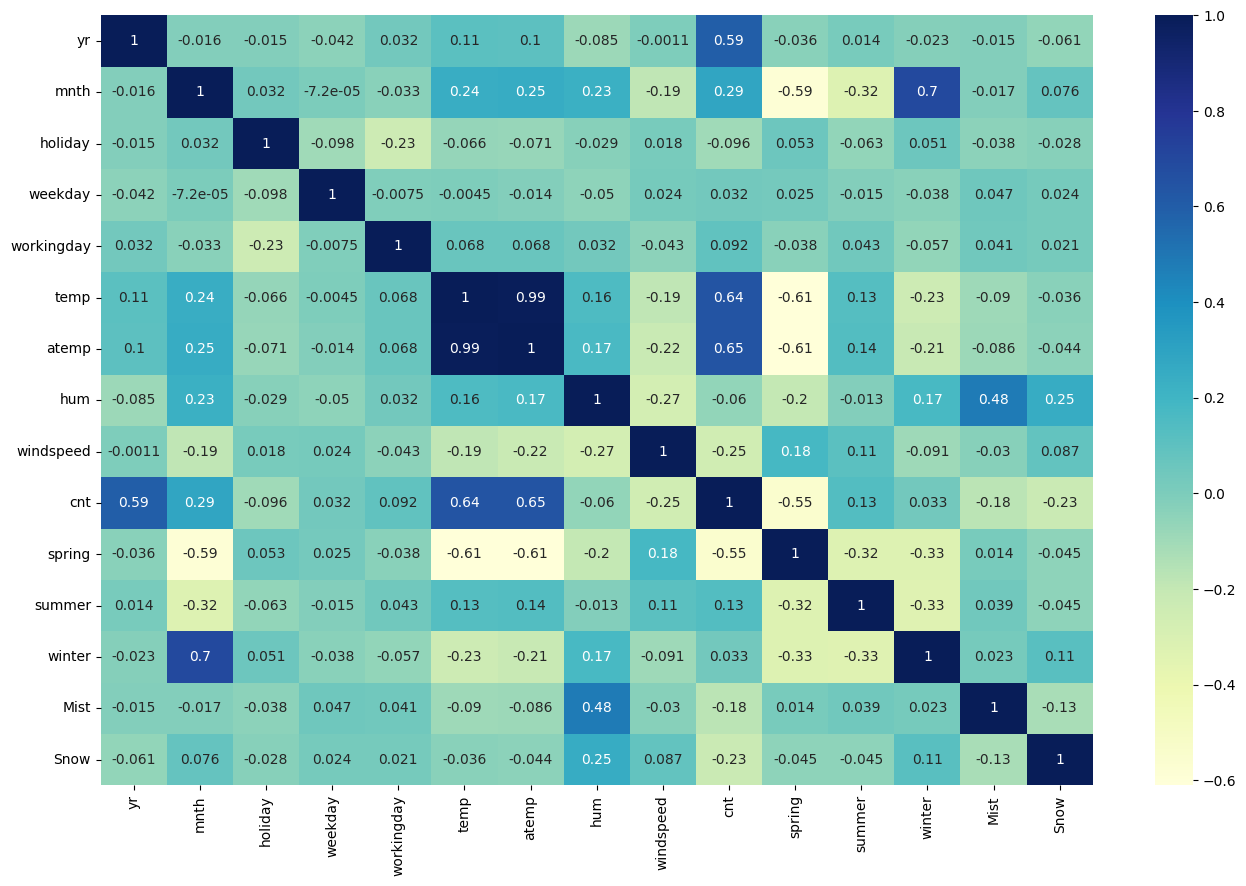

In [49]:
# Check the correlation between features.

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- atemp and temp has the highest correlation with cnt.

### Dividing into X and Y sets for the model building 

In [50]:
y_train = df_train.pop('cnt')
X_train = df_train

In [51]:
X_train.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'spring', 'summer', 'winter', 'Mist', 'Snow'],
      dtype='object')

## Step 5: Building a linear model

### Adding all the variables to the model

In [52]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const         0.238973
yr            0.232160
mnth          0.001144
holiday      -0.064151
weekday       0.008094
workingday    0.018820
temp          0.435309
atemp         0.060468
hum          -0.126044
windspeed    -0.178078
spring       -0.070159
summer        0.045683
winter        0.085435
Mist         -0.058190
Snow         -0.247813
dtype: float64

In [53]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.3
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          1.69e-182
Time:                        14:23:28   Log-Likelihood:                 496.00
No. Observations:                 510   AIC:                            -962.0
Df Residuals:                     495   BIC:                            -898.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2390      0.039      6.059      0.0

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,379.54
6,atemp,366.61
7,hum,30.85
1,mnth,15.43
8,windspeed,5.05
11,winter,4.73
9,spring,4.36
4,workingday,3.20
3,weekday,3.18
10,summer,2.66


 - **atemp have high P-Value and High VIF so we have to drop atemp.**

In [56]:
X_train.drop(['atemp'], axis = 1, inplace = True)

In [57]:
X_train_lm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.2
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          1.31e-183
Time:                        14:23:28   Log-Likelihood:                 495.91
No. Observations:                 510   AIC:                            -963.8
Df Residuals:                     496   BIC:                            -904.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2388      0.039      6.060      0.0

In [58]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,hum,30.79
5,temp,17.16
1,mnth,15.43
7,windspeed,4.83
10,winter,4.60
8,spring,4.28
4,workingday,3.20
3,weekday,3.17
9,summer,2.56
11,Mist,2.33


- **mnth have high P-Value so we have to drop mnth.**

In [59]:
X_train.drop(['mnth'], axis = 1, inplace = True)

In [60]:
X_train_lm = sm.add_constant(X_train)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.4
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          1.00e-184
Time:                        14:23:28   Log-Likelihood:                 495.78
No. Observations:                 510   AIC:                            -965.6
Df Residuals:                     497   BIC:                            -910.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2459      0.037      6.718      0.0

In [61]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,hum,27.38
4,temp,15.70
6,windspeed,4.69
7,spring,3.90
3,workingday,3.19
2,weekday,3.11
9,winter,3.11
10,Mist,2.28
8,summer,2.27
0,yr,2.08


- **hum have high VIF so we have to drop hum.**

In [62]:
X_train.drop(['hum'], axis = 1, inplace = True)

In [63]:
X_train_lm = sm.add_constant(X_train)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     221.3
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          9.96e-184
Time:                        14:23:28   Log-Likelihood:                 490.61
No. Observations:                 510   AIC:                            -957.2
Df Residuals:                     498   BIC:                            -906.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1813      0.031      5.892      0.0

In [64]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,5.26
5,windspeed,4.63
3,workingday,3.15
2,weekday,3.10
6,spring,2.28
0,yr,2.07
7,summer,1.85
8,winter,1.75
9,Mist,1.54
1,holiday,1.10


- **temp have high VIF so we have to drop temp.**

In [65]:
X_train.drop(['temp'], axis = 1, inplace = True)

In [66]:
X_train_lm = sm.add_constant(X_train)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     160.9
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          4.20e-149
Time:                        14:23:28   Log-Likelihood:                 405.95
No. Observations:                 510   AIC:                            -789.9
Df Residuals:                     499   BIC:                            -743.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5571      0.018     31.409      0.0

In [67]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,windspeed,3.96
2,weekday,2.65
3,workingday,2.61
5,spring,1.90
0,yr,1.86
6,summer,1.85
7,winter,1.71
8,Mist,1.53
9,Snow,1.08
1,holiday,1.07


- **workingday have high P-Value so we have to drop workingday.**

In [68]:
X_train.drop(['workingday'], axis = 1, inplace = True)

In [69]:
X_train_lm = sm.add_constant(X_train)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     177.4
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          1.98e-149
Time:                        14:23:28   Log-Likelihood:                 404.04
No. Observations:                 510   AIC:                            -788.1
Df Residuals:                     500   BIC:                            -745.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5728      0.016     36.215      0.0

In [70]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.78
2,weekday,2.53
4,spring,1.88
5,summer,1.81
0,yr,1.79
6,winter,1.67
7,Mist,1.51
8,Snow,1.08
1,holiday,1.04


## Step 7: Residual Analysis of the train data

In [71]:
y_train_cnt = lr_6.predict(X_train_lm)

C:\Users\harsh.trivedi\AppData\Roaming\MobaXterm\slash\var\log\xwin\ipykernel_2776\1373751026.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_cnt), bins = 20)


Text(0.5, 0, 'Errors')

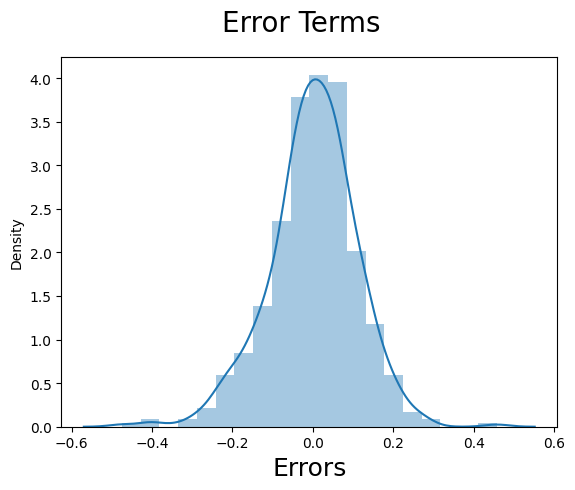

In [72]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

- **The residuals are following the normally distributed with a mean 0. So model is significant.**

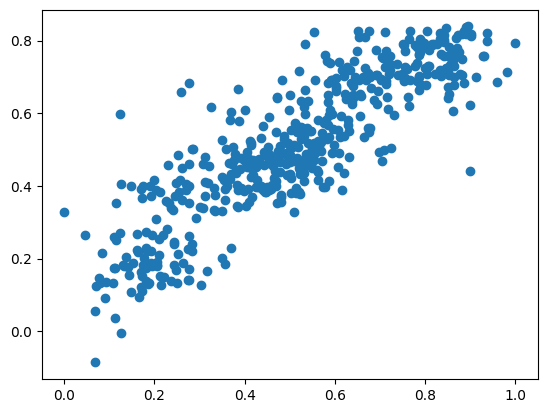

In [73]:
plt.scatter(y_train,y_train_cnt)
plt.show()

In [74]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_train, y_train_cnt)
r_squared = r2_score(y_train, y_train_cnt)

In [75]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.012006240877407407
r_square_value : 0.761510851564262


###  R-Square of the Training Model is 0.76.

## Step 8: Making Predictions Using the Final Model

In [76]:
num_vars = ['temp', 'atemp', 'hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [77]:
y_test = df_test.pop('cnt')
X_test = df_test

In [78]:
X_test = X_test.drop(["workingday","temp","hum","mnth","atemp"], axis = 1)

In [79]:
X_test_m4 = sm.add_constant(X_test)

In [80]:
y_test_pred = lr_6.predict(X_test_m4)

## Step 9: Model Evaluation

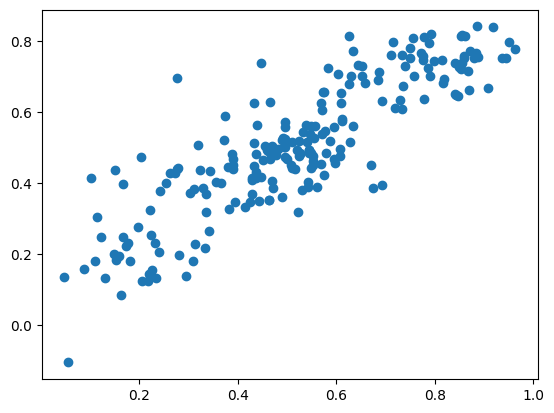

In [81]:
plt.scatter(y_test,y_test_pred)
plt.show()

In [82]:
mse_test = mean_squared_error(y_test, y_test_pred)
r_squared_test = r2_score(y_test, y_test_pred)
print('Mean_Squared_Error :' ,mse_test)
print('r_square_value :',r_squared_test)

Mean_Squared_Error : 0.012250062099956776
r_square_value : 0.7420811945930919


###  R-Square of the Test Model is 0.74.

## Diffrence of R-Square Training and Testing is 2% which is low so Model is not Over-Fitted.

>## weathersit, season, windspeed, weekday, holiday are significant in predicting the demand for shared bikes.

>## About 74% of the variance is explained by the Model.